<a href="https://colab.research.google.com/github/jamilaandimen/MLCoursera/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Imports
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import plotly.plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [49]:
train_data = pd.read_csv("Train_v2.csv", header='infer')
country = train_data['country'].tolist()
train_data = train_data.set_index(['uniqueid', 'country']) #The Id column will be our index
train_data['country'] = country
test_data = pd.read_csv("Test_v2.csv", header='infer')
country = test_data['country'].tolist()
test_data = test_data.set_index(['uniqueid', 'country'])
test_data['country'] = country

train_data.head()

,,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,country
uniqueid,country,,,,,,,,,,,,
uniqueid_1,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Kenya
uniqueid_2,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Kenya
uniqueid_3,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Kenya
uniqueid_4,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Kenya
uniqueid_5,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,Kenya


In [50]:
#Looking data format and types
print(train_data.info())

# printing test info()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8501 entries, (uniqueid_1, Kenya) to (uniqueid_2433, Rwanda)
Data columns (total 12 columns):
year                      8501 non-null int64
bank_account              8501 non-null object
location_type             8501 non-null object
cellphone_access          8501 non-null object
household_size            8501 non-null int64
age_of_respondent         8501 non-null int64
gender_of_respondent      8501 non-null object
relationship_with_head    8500 non-null object
marital_status            8500 non-null object
education_level           8500 non-null object
job_type                  8500 non-null object
country                   8501 non-null object
dtypes: int64(3), object(9)
memory usage: 869.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10086 entries, (uniqueid_6056, Kenya) to (uniqueid_3002, Uganda)
Data columns (total 11 columns):
year                      10086 non-null int64
location_type             10086 non-null ob

In [51]:
#Some Statistics
train_data.describe()

,year,household_size,age_of_respondent
count,8501.000000,8501.000000,8501.000000
mean,2017.427597,4.138454,39.373368
std,0.904023,2.247666,16.893246
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2018.000000,4.000000,35.000000
75%,2018.000000,6.000000,50.000000
max,2018.000000,21.000000,98.000000


In [52]:
#Take a look at the data
print(train_data.head())

                    year bank_account  ...                   job_type country
uniqueid   country                     ...                                   
uniqueid_1 Kenya    2018          Yes  ...              Self employed   Kenya
uniqueid_2 Kenya    2018           No  ...       Government Dependent   Kenya
uniqueid_3 Kenya    2018          Yes  ...              Self employed   Kenya
uniqueid_4 Kenya    2018           No  ...  Formally employed Private   Kenya
uniqueid_5 Kenya    2018           No  ...        Informally employed   Kenya

[5 rows x 12 columns]


In [53]:


#Looking how the data is and searching for a re patterns
train_data["job_type"].head()



uniqueid    country
uniqueid_1  Kenya                  Self employed
uniqueid_2  Kenya           Government Dependent
uniqueid_3  Kenya                  Self employed
uniqueid_4  Kenya      Formally employed Private
uniqueid_5  Kenya            Informally employed
Name: job_type, dtype: object

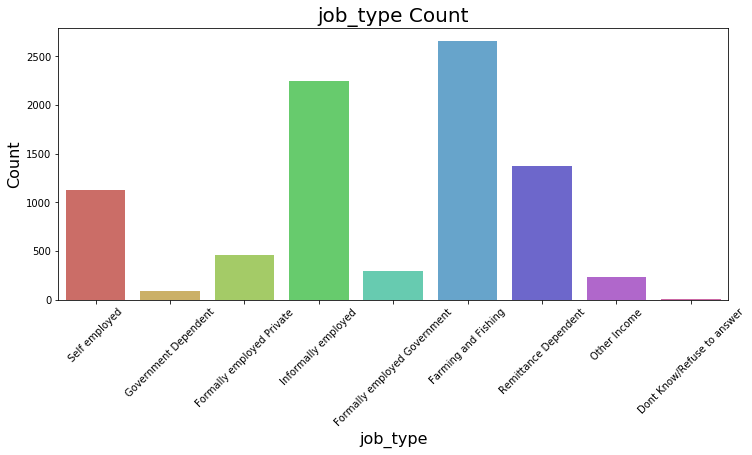

In [54]:
import re
#GettingLooking the prefix of all Passengers
#train_data.job_type = train_data.job_type.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#defining the figure size of our graphic
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='job_type', data=train_data, palette="hls")
plt.xlabel("job_type", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("job_type Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

Chances to have bank_account based on JOB TYPE: 
uniqueid    country
uniqueid_1  Kenya      1
uniqueid_2  Kenya      0
uniqueid_3  Kenya      1
uniqueid_4  Kenya      0
uniqueid_5  Kenya      0
Name: bank_account, dtype: int64
job_type
Dont Know/Refuse to answer      0.083333
Farming and Fishing             0.154945
Formally employed Government    0.820690
Formally employed Private       0.529412
Government Dependent            0.230769
Informally employed             0.106667
Other Income                    0.348936
Remittance Dependent            0.115805
Self employed                   0.365164
Name: bank_account, dtype: float64


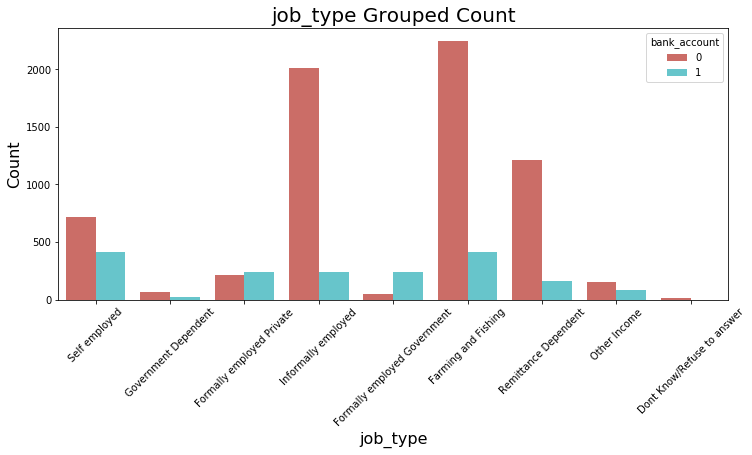

In [59]:
#printing the chance to survive by each title
print("Chances to have bank_account based on JOB TYPE: ") 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data[['bank_account']] = train_data[['bank_account']].apply(lambda col: le.fit_transform(col))
print(train_data['bank_account'].head())
#train_data = pd.get_dummies(train_data, columns = [bank_account])

print(train_data.groupby("job_type")["bank_account"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='job_type', data=train_data, palette="hls",
              hue="bank_account")
plt.xlabel("job_type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("job_type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()


Chances to have bank_account based on LOCATION TYPE: 
location_type
Rural    0.143262
Urban    0.350385
Name: bank_account, dtype: float64


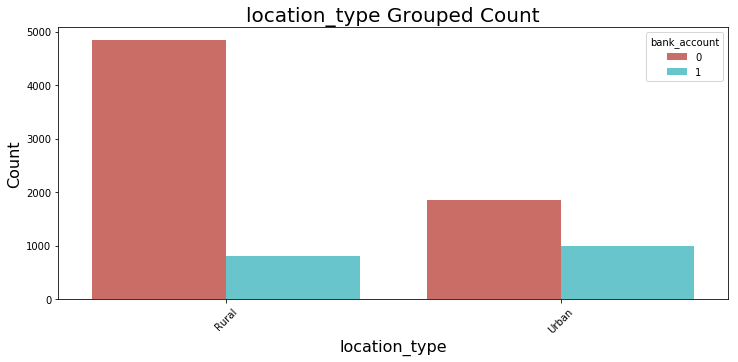

In [60]:
#printing the chance to survive by each title
print("Chances to have bank_account based on LOCATION TYPE: ") 

print(train_data.groupby("location_type")["bank_account"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='location_type', data=train_data, palette="hls",
              hue="bank_account")
plt.xlabel("location_type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("location_type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Chances to have bank_account based on age: 
age_of_respondent
16    0.016575
17    0.030612
18    0.048077
19    0.100671
20    0.098592
21    0.145570
22    0.168421
23    0.239583
24    0.255319
25    0.214815
26    0.241935
27    0.173913
28    0.262238
29    0.218391
30    0.216958
31    0.228916
32    0.284091
33    0.228070
34    0.239130
35    0.233898
36    0.291925
37    0.285714
38    0.268868
39    0.225806
40    0.322222
41    0.221154
42    0.358696
43    0.195312
44    0.236559
45    0.225806
        ...   
68    0.265306
69    0.121951
70    0.167939
71    0.229167
72    0.260870
73    0.200000
74    0.230769
75    0.140000
76    0.214286
77    0.333333
78    0.138889
79    0.294118
80    0.265306
81    0.125000
82    0.187500
83    0.083333
84    0.222222
85    0.117647
86    0.181818
87    0.142857
88    0.181818
89    0.125000
90    0.111111
91    0.000000
92    0.000000
93    0.250000
94    0.000000
95    0.214286
97    0.000000
98    0.000000
Name: bank_account, Len

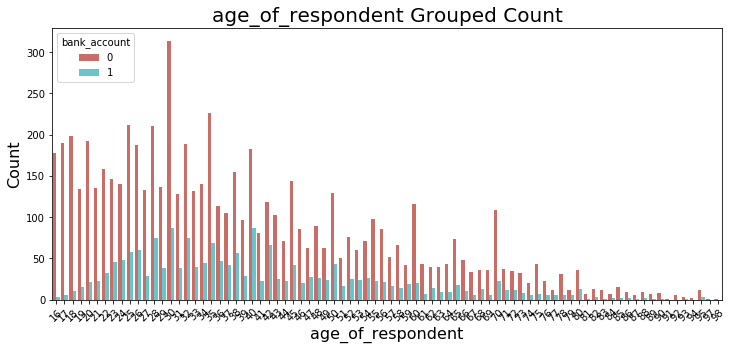

In [62]:
#printing the chance to survive by each title
print("Chances to have bank_account based on age: ") 


print(train_data.groupby("age_of_respondent")["bank_account"].mean())

# figure size
plt.figure(figsize=(12,5))

#Plotting the count of title by Survived or not category
sns.countplot(x='age_of_respondent', data=train_data, palette="hls",
              hue="bank_account")
plt.xlabel("age_of_respondent", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("age_of_respondent Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [65]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = train_data.groupby(["gender_of_respondent","job_type","location_type"])["age_of_respondent"]

#printing the variabe that we created by median
print(age_group.median())

gender_of_respondent  job_type                      location_type
Female                Dont Know/Refuse to answer    Rural            38.0
                                                    Urban            36.0
                      Farming and Fishing           Rural            41.0
                                                    Urban            43.0
                      Formally employed Government  Rural            36.0
                                                    Urban            33.5
                      Formally employed Private     Rural            32.0
                                                    Urban            29.0
                      Government Dependent          Rural            73.0
                                                    Urban            78.0
                      Informally employed           Rural            35.0
                                                    Urban            31.0
                      Other Income            

In [66]:
#Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's
age_group = train_data.groupby(["gender_of_respondent","job_type","location_type"])["bank_account"]

#printing the variabe that we created by median
print(age_group.median())

gender_of_respondent  job_type                      location_type
Female                Dont Know/Refuse to answer    Rural            0.0
                                                    Urban            0.0
                      Farming and Fishing           Rural            0.0
                                                    Urban            0.0
                      Formally employed Government  Rural            1.0
                                                    Urban            1.0
                      Formally employed Private     Rural            0.0
                                                    Urban            1.0
                      Government Dependent          Rural            0.0
                                                    Urban            0.0
                      Informally employed           Rural            0.0
                                                    Urban            0.0
                      Other Income                  Rural 

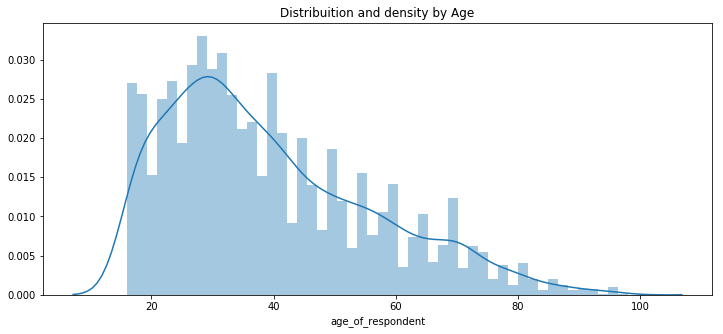

In [68]:


#Let's see the result of the inputation

#seting the figure size
plt.figure(figsize=(12,5))

#ploting again the Age Distribuition after the transformation in our dataset
sns.distplot(train_data["age_of_respondent"], bins=50)
plt.title("Distribuition and density by Age")
plt.xlabel("age_of_respondent")
plt.show()



<Figure size 864x360 with 0 Axes>

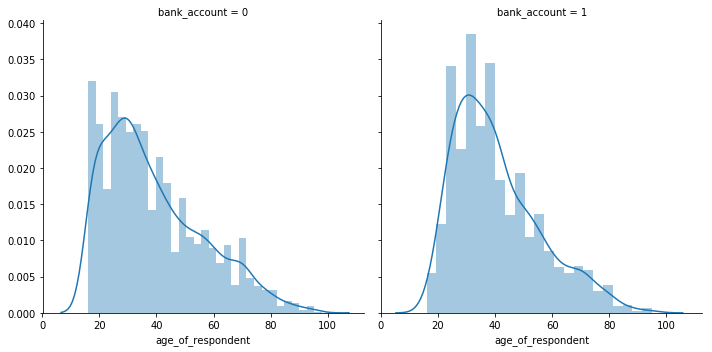

In [69]:
#separate by survivors or not

# figure size
plt.figure(figsize=(12,5))

# using facetgrid that is a great way to get information of our dataset
g = sns.FacetGrid(train_data, col='bank_account',size=5)
g = g.map(sns.distplot, "age_of_respondent")
plt.show()

In [71]:
#df_train.Age = df_train.Age.fillna(-0.5)

#creating the intervals that we need to cut each range of ages
interval = (0, 5, 12, 18, 25, 35, 60, 120) 

#Seting the names that we want use to the categorys
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# Applying the pd.cut and using the parameters that we created 
train_data["Age_cat"] = pd.cut(train_data.age_of_respondent, interval, labels=cats)

# Printing the new Category
train_data["Age_cat"].head()


uniqueid    country
uniqueid_1  Kenya      Student
uniqueid_2  Kenya       Senior
uniqueid_3  Kenya        Young
uniqueid_4  Kenya        Young
uniqueid_5  Kenya        Young
Name: Age_cat, dtype: category
Categories (7, object): [babies < Children < Teen < Student < Young < Adult < Senior]

In [0]:
#Do the same to test dataset 
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#same as the other df train
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# same that we used above in df train
test_data["Age_cat"] = pd.cut(test_data.age_of_respondent, interval, labels=cats)

#Describe of categorical Age

# Using pd.crosstab to understand the Survived rate by Age Category's
print(pd.crosstab(train_data.Age_cat, train_data.bank_account))

train_data[['cellphone_access']] = train_data[['cellphone_access']].apply(lambda col: le.fit_transform(col))
print(train_data['cellphone_access'].head())


#Seting the figure size
plt.figure(figsize=(12,10))

#Plotting the result
plt.subplot(2,1,1)
sns.countplot("Age_cat",data=train_data,hue="bank_account", palette="hls")
plt.ylabel("Count", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("Age Distribution ", fontsize=20)

plt.subplot(2,1,2)
sns.swarmplot(x='Age_cat',y="cellphone_access",data=train_data,
              hue="bank_account", palette="hls", )
plt.ylabel("cellphone_access Distribution", fontsize=18)
plt.xlabel("Age Categorys", fontsize=18)
plt.title("cellphone_access Distribution by Age Categorys ", fontsize=20)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()



bank_account     0    1
Age_cat                
Teen           566   19
Student       1117  243
Young         1797  553
Adult         2315  782
Senior         897  212
uniqueid    country
uniqueid_1  Kenya      1
uniqueid_2  Kenya      0
uniqueid_3  Kenya      1
uniqueid_4  Kenya      1
uniqueid_5  Kenya      0
Name: cellphone_access, dtype: int64


In [0]:

#Let's cross our Pclass with the Age_cat

We will aggregate than to get the mean of Fare by each category pair

Age_fare = ['Pclass', 'Age_cat'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[Age_fare[0]], df_train[Age_fare[1]], 
            values=df_train['Fare'], aggfunc=['mean']).style.background_gradient(cmap = cm)

